## Dataset for the manuscript entitled Efficient Signal Processing by Averaging in the Wavelet Domain

#### Authors: Leah S. Woldemariam, Aritro Sinha Roy, Madhur Srivastava

In [3]:
# Load the necessary packages
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Define gaussian function
def gaussian(xmin, xmax, mu, sigma, pts):
    xvals = np.linspace(xmin, xmax, pts)
    data = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(xvals - mu)**2/(2*sigma**2))
    return data / data.max()

# Define lorentzian function
def lorentz(xmin, xmax, mu, tau, pts):
    xvals = np.linspace(xmin, xmax, pts)
    data = 1/(2*np.pi)*tau / ((xvals-mu)**2 + (tau**2/2))
    return data / data.max()

# define damped sinosuidal function
def sinod(xmin, xmax, a, b, h, pts):
    xvals = np.linspace(xmin, xmax, pts)
    decay = np.exp(-xvals / (a*xmax))
    data = np.sin(b*(xvals-h))*decay
    return data / data.max()

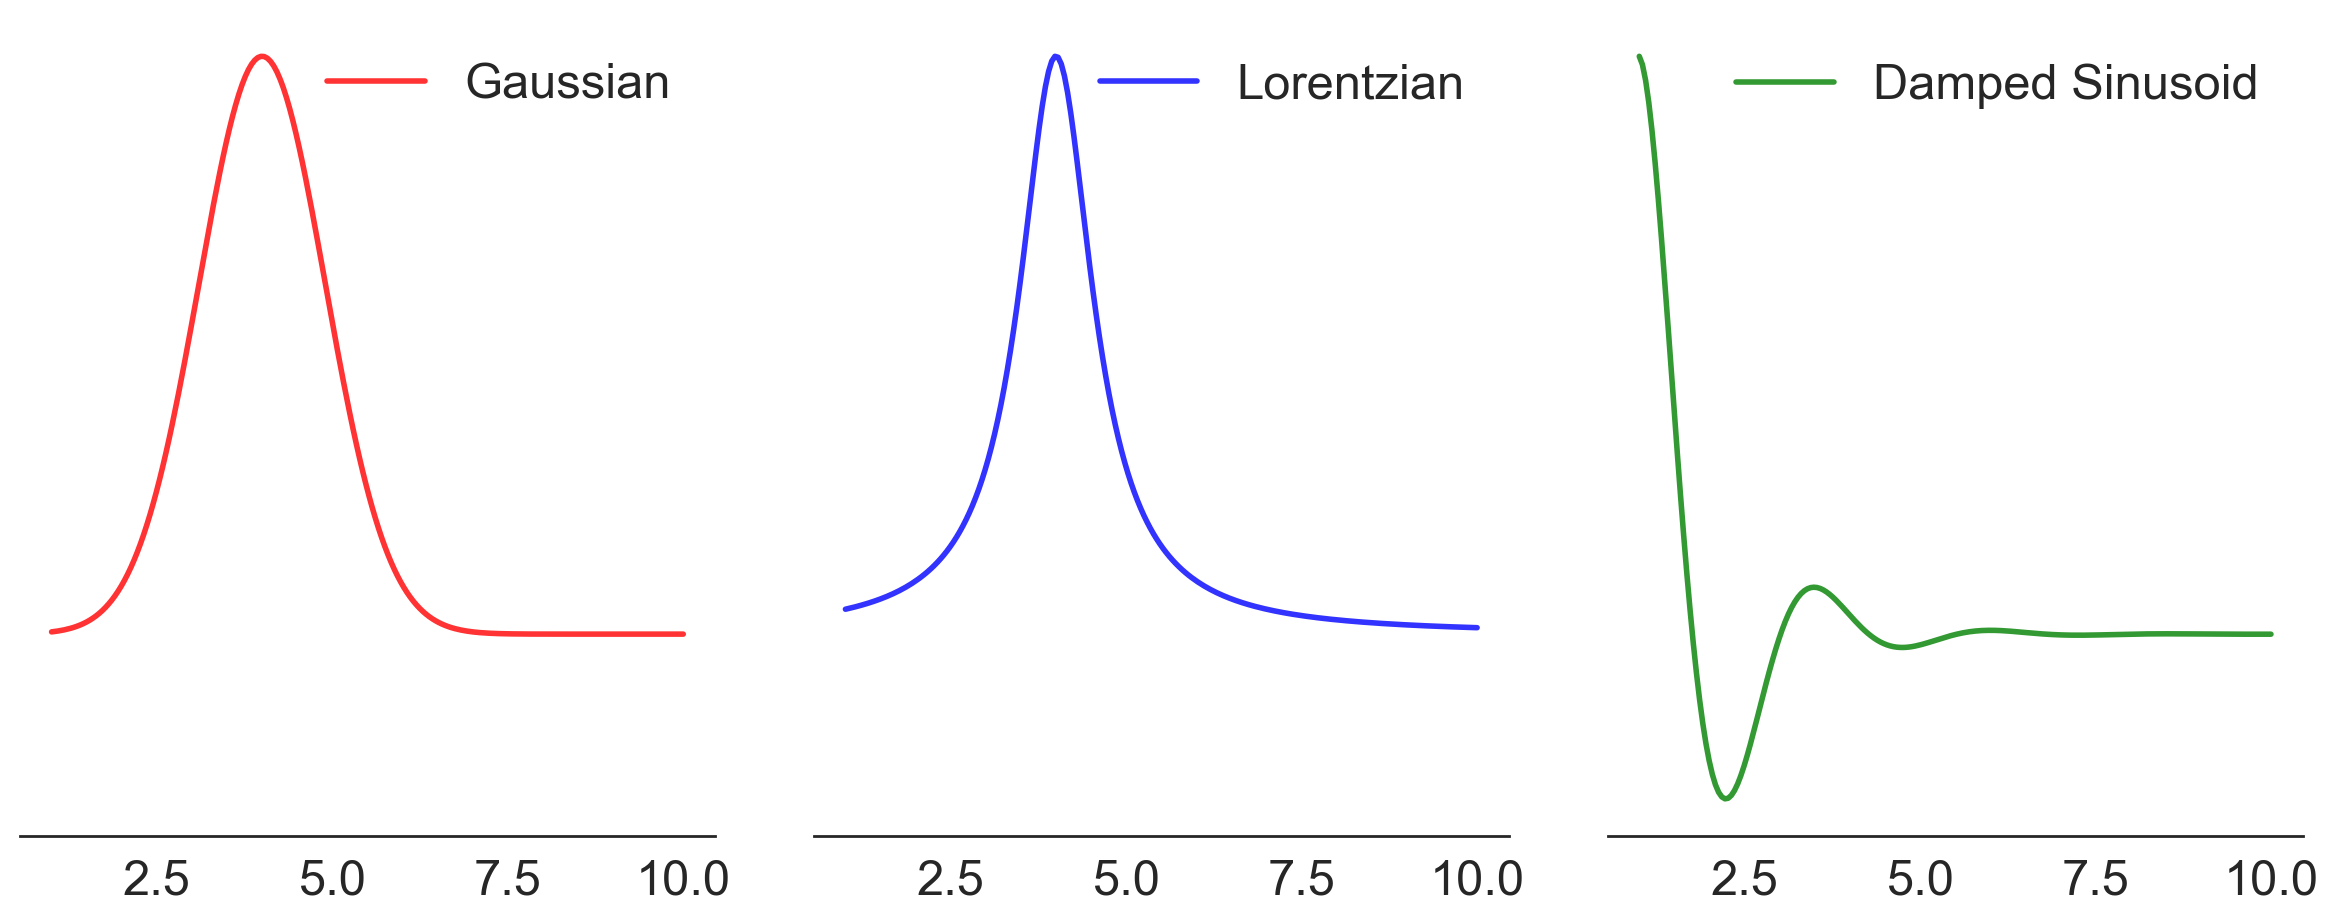

In [31]:
# Set seaborn plot style
sns.set_theme(context='paper', style='white', palette = 'bright', 
              font='sans-serif', font_scale = 2.0, color_codes = True, rc = None)


fig,axs = plt.subplots(1,3, sharey = True, figsize = (12,5), dpi = 200)

# Define parameters
xmin, xmax, pts = 1,10,200
mu, sigma, tau = 4.0, 0.9, 0.9
a, b, h = 0.1, 2.5, 0.5
xvals = np.linspace(xmin, xmax, pts)

# Generate sample data
dat1 = gaussian(xmin, xmax, mu, sigma, pts)
dat2 = lorentz(xmin, xmax, mu, tau, pts)
dat3 = sinod(xmin, xmax, a, b, h, pts)

data = [dat1, dat2, dat3]
colors = ['red', 'blue', 'green']
labels = ['Gaussian', 'Lorentzian', 'Damped Sinusoid']

for i in range(3):
    g1 = sns.lineplot(x = xvals, y = data[i], ax = axs[i], color = colors[i], linewidth = 2,
                     alpha = 0.8, label = labels[i])
    axs[i].spines[['left', 'top', 'right']].set_visible(False)
    axs[i].set(yticks = [])
    axs[i].legend(frameon = False, loc = 1)

plt.tight_layout()
plt.show()

In [54]:
# Define gaussian noise
def _noise(amp, pts):
    return amp*np.random.normal(scale = 0.15, size = pts)

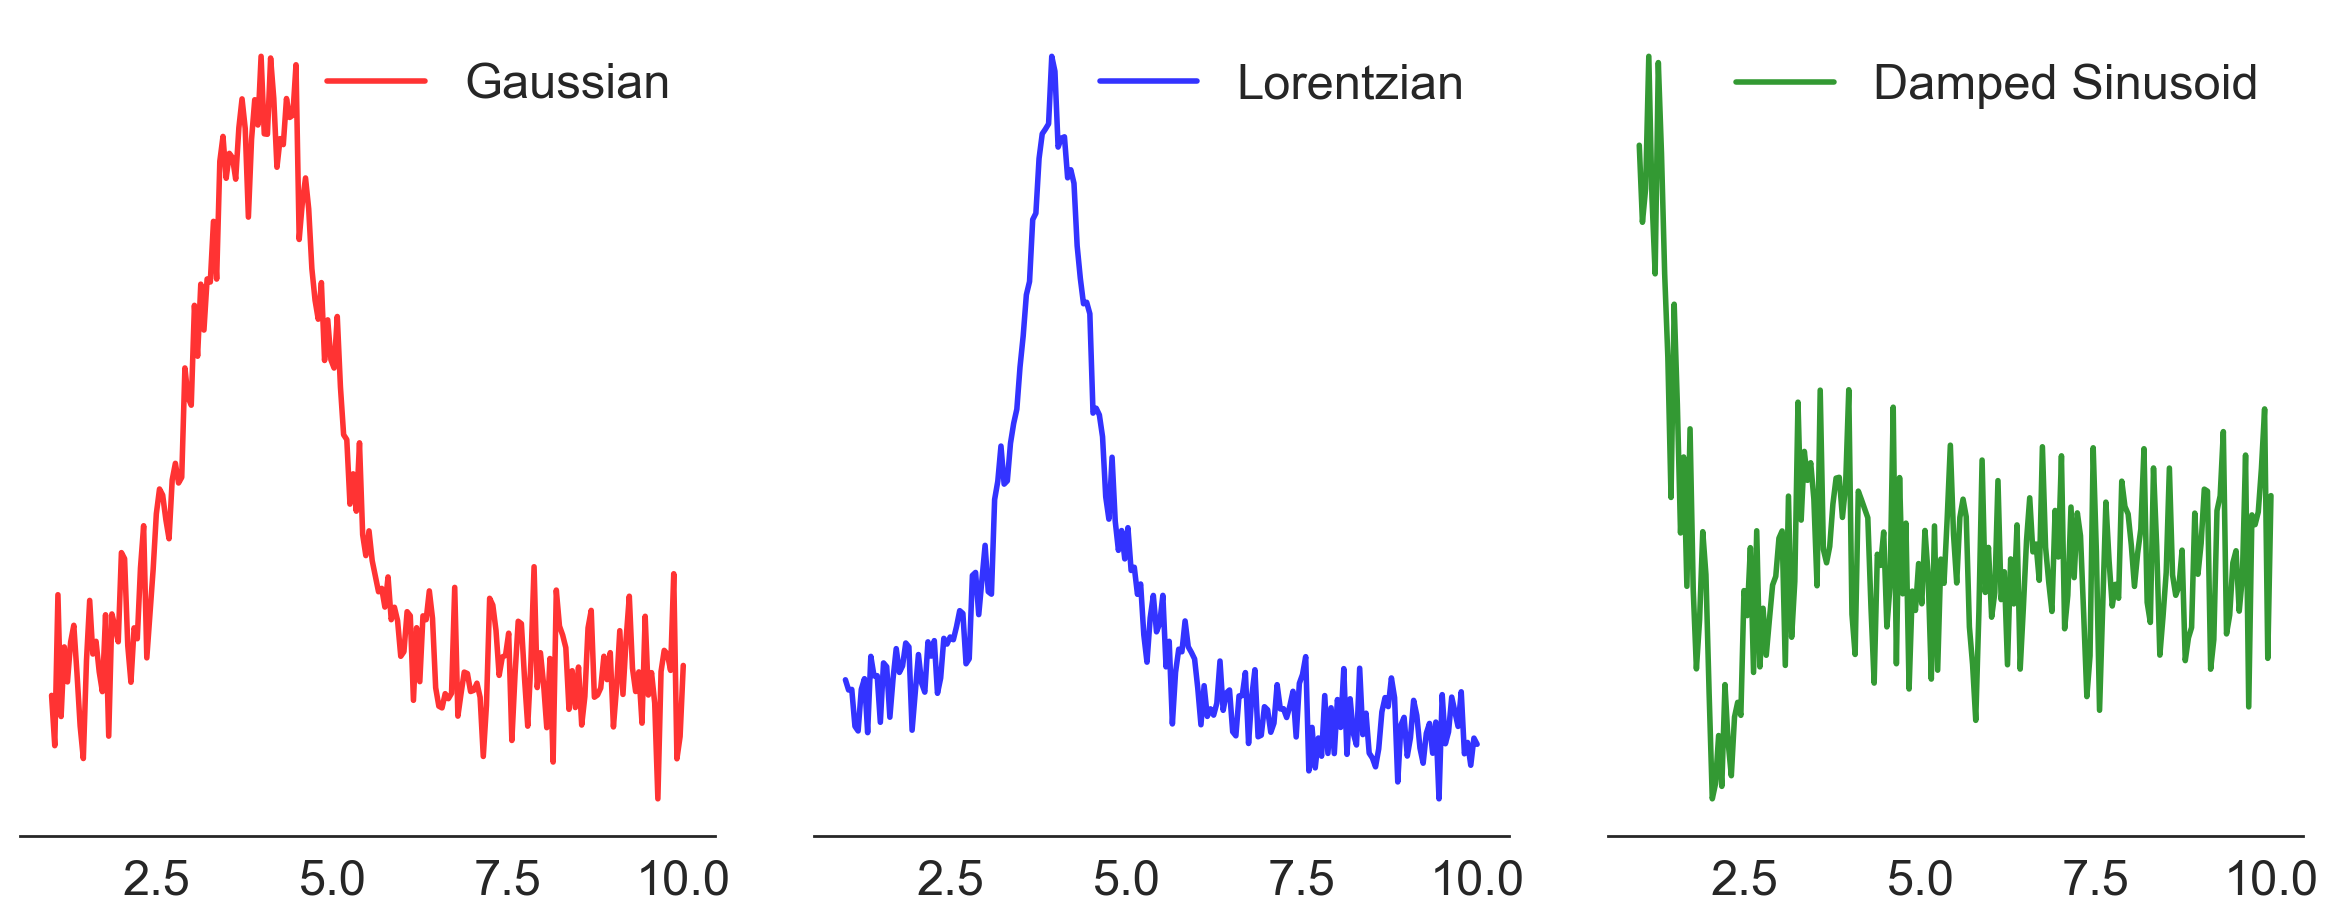

In [64]:
fig,axs = plt.subplots(1,3, sharey = False, figsize = (12,5), dpi = 200)

# Add gaussian noise to sample data
dat1p = dat1 + _noise(0.5, pts)
dat2p = dat2 + _noise(0.3, pts)
dat3p = dat3 + _noise(1.0, pts)

data = [dat1p, dat2p, dat3p]
colors = ['red', 'blue', 'green']
labels = ['Gaussian', 'Lorentzian', 'Damped Sinusoid']

for i in range(3):
    g1 = sns.lineplot(x = xvals, y = data[i], ax = axs[i], color = colors[i], linewidth = 2,
                     alpha = 0.8, label = labels[i])
    axs[i].spines[['left', 'top', 'right']].set_visible(False)
    axs[i].set(yticks = [])
    axs[i].legend(frameon = False, loc = 1)

plt.tight_layout()
plt.show()

In [69]:
# Signal time averaging
dat = dat3p.copy()
for i in range(500):
    noise = _noise(1.0, pts)
    ndat = dat3 + noise
    dat += ndat
dat = dat / dat.max()

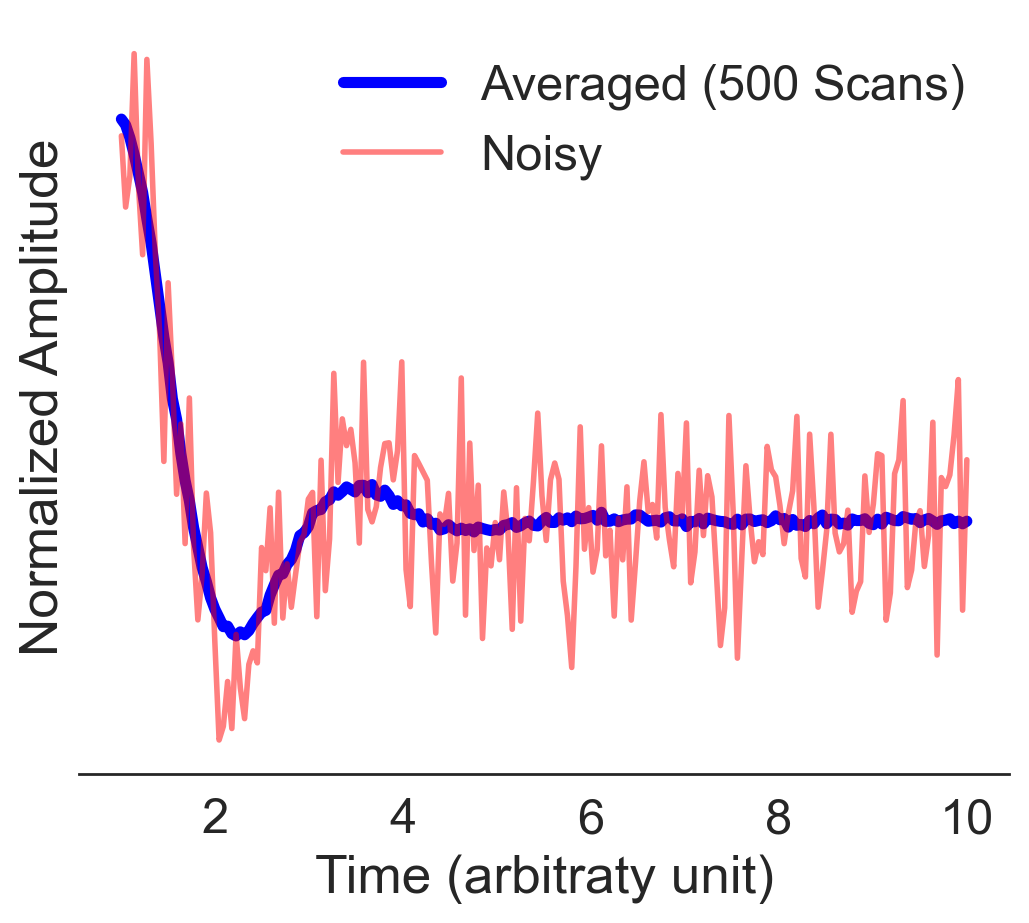

In [74]:
fig,axs = plt.subplots(figsize = (6,5), dpi = 200)

sns.lineplot(x = xvals, y = dat, color = 'blue', linewidth = 4, label = 'Averaged (500 Scans)')
sns.lineplot(x = xvals, y = dat3p, color = 'red', linewidth = 2, alpha = 0.5, label = 'Noisy')

axs.legend(frameon = False)
axs.spines[['top', 'left', 'right']].set_visible(False)
axs.set(yticks = [], ylabel = 'Normalized Amplitude', xlabel = 'Time (arbitraty unit)')

plt.show()

### Create Dataset for Analysis

In [110]:
num = 1000 # size of the dataset 

# Define fixed parameters
xmin, xmax, pts = 0,10,200
xvals = np.linspace(xmin, xmax, pts)

dataset = pd.DataFrame()

for i in range(num):
    # Set the rest of the parameters randomly
    mu, sigma, tau = np.random.randint(2, 6), np.random.uniform(0.5, 1.0), np.random.uniform(0.5, 1.0)
    a, b, h = np.random.uniform(0.1, 0.2), np.random.uniform(0.1, 4.0), np.random.uniform(0.2, 5.0)
    op = np.random.choice([1,2,3]) # random selection of an option
    if op == 1:
        dat = gaussian(xmin, xmax, mu, sigma, pts)
    elif op == 2:
        dat = lorentz(xmin, xmax, mu, tau, pts)
    else:
        dat = sinod(xmin, xmax, a, b, h, pts)
    
    amp = np.random.uniform(0.1, 1.0)
    noise = _noise(amp, pts)
    
    data = pd.DataFrame({'num': [str(i+1)]*pts, 
                        'x_values': xvals,
                       'y_values': dat,
                        'noise': noise})

    dataset = pd.concat([dataset,data])

In [111]:
# Check the dataset
dataset.head()

,num,x_values,y_values,noise
0,1,0.000000,0.019309,0.021646
1,1,0.050251,0.019696,-0.027613
2,1,0.100503,0.020094,-0.057804
3,1,0.150754,0.020504,-0.022191
4,1,0.201005,0.020926,0.017393


### End of File